# Sales Data Analysis Project
   **Project Description:** This project analyzes a years worth of sales data. It utilizes python libraries to 
    answer real business world problems. 
       
   **References of stackoverflow are in each cell, when used**
   

## Importing libraries used in program 

In [7]:
# importing libraries 
import pandas as pd
import os # used to read all files from the directory 
import matplotlib.pyplot as plt # used to create visualizations
from itertools import combinations # used to answer question 4
from collections import Counter # used to answer question 4

## Merge the 12 months of sales data into a single CSV fie 

In [8]:
# reading all files from the directory using os.listdir
files = [file for file in os.listdir("./Sales_Data")]

# creating all_months_data dataframe 
# () is empty b/c we use the for function to concatenate all the data
all_months_data = pd.DataFrame()

# concatenating all 12 files into all_months_data dataframe
for file in files:
#   reading all data files
    df = pd.read_csv("./Sales_Data/"+file)
#   concatenating data into all_month_data
    all_months_data = pd.concat([all_months_data, df])

# creating all_data.csv file (index=False b/c no need for index values)
all_months_data.to_csv("all_data.csv", index=False)

## Read in updated dataframe (merged 12 months of data into all_data)

In [9]:
# updated dataframe 
all_data = pd.read_csv("all_data.csv")
# printing first 10 rows
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001"
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001"
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001"


## Clean up the data

In [10]:
# drop rows of NaN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

# dropping all NaN values
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [11]:
# finding "Or" and delete it 
# printing new all_data dataframe to no include 'Or' values
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001"
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001"
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001"


In [12]:
# convert columns to the correct type 
# need to convert in order to successfully add sales column
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])# Make float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Augment data with additional columns 

### Add month column
    - Need a month column in order to answer question 1

In [13]:
# creating month column
# converting into string, [0:2] is grabbing the first 2 characters 
all_data['Month'] = all_data['Order Date'].str[0:2]
# converting into numeric value, but can't do this until you clean NaN values
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Add a sales column

In [14]:
# add sales columns, values are quantity * price
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Add a city column
    - Need a city column in order to answer question 2

In [15]:
# define a function to get city
def get_city(address):
    # splitting between the commas to get city at index 1
    return address.split(',')[1]
# define a function to get state 
# this is important becuase Portland, Or and Portland, ME are in the dataset 
def get_state(address):
    # splitting between the commas to get state at index 2, splitting between whitespace
    return address.split(',')[2].split(' ')[1]

# use .apply() method that allows us to run any function in our dataframe
# lambda x helps grab us cell contents 
# used f method to format city (state)
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


## Question 1: What was the best month for sales? How much was earned that month?

In [16]:
# use groupby() to group month column and finding the sum
results = all_data.groupby('Month').sum()

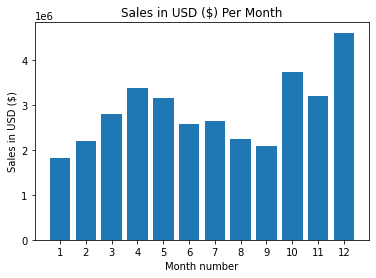

In [17]:
# using matplotlib to graph a bar chart (visualize correlations)
months = range(1,13) # 13 is exclusve so 1-12

plt.bar(months, results['Sales'])
plt.xticks(months) # see every month number
plt.title('Sales in USD ($) Per Month') # bar chart title 
plt.ylabel('Sales in USD ($)') # y-axis label
plt.xlabel('Month number') # x-axis label
plt.show()

## Question 1 Answer: 
    - December
    - December Sales: Approximately $4,613,000

## Question 2: What city had the highest number of sales?

In [18]:
# use groupby() to group city column and finding the sum
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


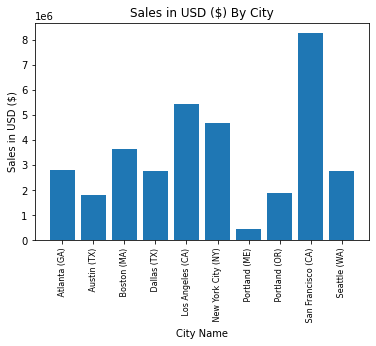

In [19]:
# using matplotlib to graph a bar chart (visualize correlations)

# making cities in the same order as sales (or else, graph shows Portland (ME) as highest instead of San Francisco)
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.title('Sales in USD ($) By City') # bar chart title 
plt.xticks(cities, rotation='vertical', size=8) # seee every city name, formatting city name to be vertical 
plt.ylabel('Sales in USD ($)') # y-axis label
plt.xlabel('City Name') # x-axis label
plt.show()

## Question 2 Answer: 
    - San Francisco

## Question 3: What time should we display advertisements to maximize likelihood of customers buying product?

In [20]:
# convert order date to date time b/c we can easily access different parts 
# of the date and time (sec, min, hour, etc)
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [21]:
# adding hour column to dataframe
all_data['Hour'] = all_data['Order Date'].dt.hour
# adding minute column to dataframe 
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


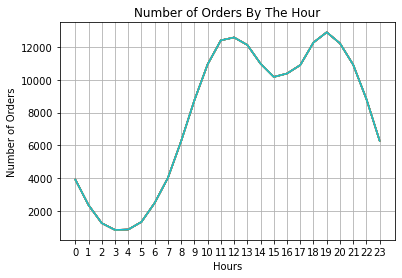

In [22]:
# creating hours keys to use in graph 
hours = [hour for hour, df in all_data.groupby('Hour')]

# creating line chart 
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.title("Number of Orders By The Hour")
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.grid() # add grid (easier to see which hour is the best time)
plt.show()

## Question 3 Answer: 
    - Recommend around 11am (11) or 7pm (19)

## Question 4: What products are most often sold together?

In [23]:
# Referenced: https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
# creating new dataframe 
# filter by all_data['Order ID'] to remove any duplicates 
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
# creating new column called Grouped 
# want to have the Products with the same OrderID to be joined on the same row
# with the same OrderID and seperate the Products with a ','
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# dropping duplicated occurances of the same pairs with the same OrderID
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()


<ipython-input-23-1b7eb1d6cdd3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [24]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
# count pairs of products that occur the most frequent
count = Counter()

# using Grouped column to grab the values
for row in df['Grouped']:
    row_list = row.split(',') # getting sublist
    count.update(Counter(combinations(row_list, 2))) # finding most 2 common purchases ordered together 

# outputs the 10 most common purchases     
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Question 4 Answer:
    - The two most common products purchased together is an "iPhone" and "Lightning Charging Cable"

## Question 5: What product sold the most? Why do you think it sold the most?

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


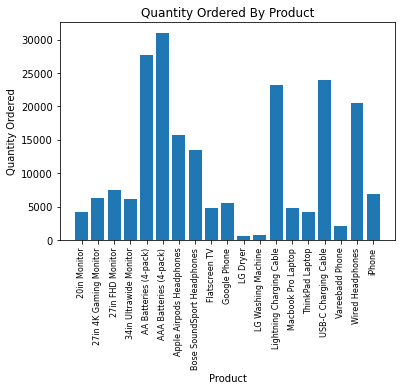

In [26]:
# grouping the Product 
product_group = all_data.groupby('Product')

# getting the sum of Quantity Ordered
quantity_ordered = product_group.sum()['Quantity Ordered']

# creating products key 
products = [product for product, df in product_group]

# creating bar chart 
plt.title("Quantity Ordered By Product")
plt.bar(products, quantity_ordered)
plt.xlabel('Product') 
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

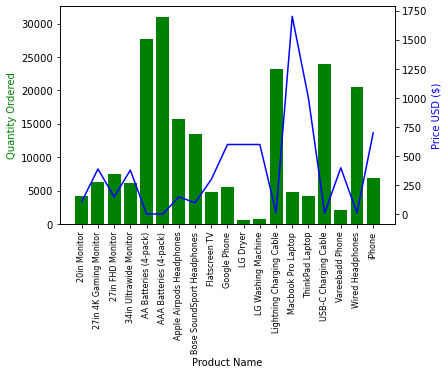

In [27]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
# get prices by grouping product and the mean to get prices of each product 
prices = all_data.groupby('Product').mean()['Price Each']

# subplot allows us to plot the prices data (line above) on top of the quantity ordered 
# by product data (blue graph above)
fig, ax1 = plt.subplots()

# combining ax2 with ax1
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g') # plotting quantity ordered by products with a bar chart in green
ax2.plot(products, prices, 'b-') # plotting prices with a line chart in blue  

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price USD ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)


plt.show()

## Question 5 Answer: 
**NOTICE THE PRODUCTS WITH HIGH QUANTITY ORDERs HAVE A LOW PRICE, THERE IS A CORRELATION!!**

    - Products that sold the most: AA/AAA Batteries, Lightning Charging Cable, USB-C Charging Cable, 
    Wired Headphones
    - I believe these products sold the most because of their low price tag, and they are essential to an 
    individuals day-to-day life. 